In [51]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [30]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [31]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [32]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract
# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
session.query(Measurement.tobs).filter(extract('month',Measurement.date) == 6 )

In [33]:
#  3. Convert the June temperatures to a list.
june_temp = list(session.query(Measurement.tobs).filter(extract('month',Measurement.date) == 6 ).all())

In [34]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temp_df = pd.DataFrame(june_temp)

In [35]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temp_df.describe()

,0
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [36]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
session.query(Measurement.tobs).filter(extract('month',Measurement.date) == 12 )

In [37]:
# 7. Convert the December temperatures to a list.
dec_temp = list(session.query(Measurement.tobs).filter(extract('month',Measurement.date) == 12 ).all())

In [38]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temp_df = pd.DataFrame(dec_temp)

In [39]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temp_df.describe()

,0
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [47]:
results_june = pd.DataFrame(session.query(Measurement.date,Measurement.tobs).filter(extract('month',Measurement.date) == 6 ))
results_june

,0,1
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0
...,...,...
1695,2017-06-26,79.0
1696,2017-06-27,74.0
1697,2017-06-28,74.0
1698,2017-06-29,76.0


In [48]:
results_december = pd.DataFrame(session.query(Measurement.date,Measurement.tobs).filter(extract('month',Measurement.date) == 12) )
results_december

,0,1
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0
...,...,...
1512,2016-12-27,71.0
1513,2016-12-28,71.0
1514,2016-12-29,69.0
1515,2016-12-30,65.0


In [105]:
june_df =  session.query(extract('day',Measurement.date), func.avg(Measurement.tobs).filter(extract('month',Measurement.date) == 6)).group_by(extract('day',Measurement.date)) 
june_df = pd.DataFrame(june_df)
june_df

,0,1
0,1,74.614035
1,2,74.400000
2,3,74.034483
3,4,73.818182
4,5,74.854545
5,6,75.175439
6,7,75.071429
7,8,75.586207
8,9,75.152542
9,10,75.142857


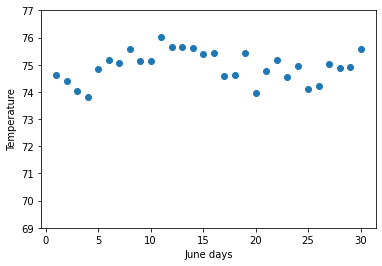

In [127]:
plt.scatter(june_df[0],june_df[1])
plt.ylabel('Temperature')
plt.xlabel('June days')
plt.ylim(69,77)
plt.show()


In [106]:
dec_df =  session.query(extract('day',Measurement.date), func.avg(Measurement.tobs).filter(extract('month',Measurement.date) == 12)).group_by(extract('day',Measurement.date)) 
dec_df = pd.DataFrame(dec_df)
dec_df

,0,1
0,1,71.916667
1,2,71.326923
2,3,72.886792
3,4,72.176471
4,5,70.921569
5,6,69.392157
6,7,69.200000
7,8,70.274510
8,9,71.901961
9,10,71.245283


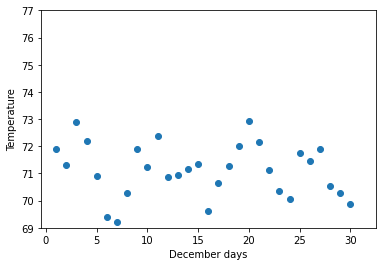

In [128]:
plt.scatter(dec_df[0],dec_df[1])
plt.ylabel('Temperature')
plt.xlabel('December days')
plt.ylim(69,77)
plt.show()